In [1]:
%matplotlib inline
import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt
import math

TIC = 'TIC 312030014'

In [2]:
search_ffi = lk.search_tesscut(TIC)

In [3]:
search_ffi

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 12,2019,TESScut,1426,TIC 312030014,0.0
1,TESS Sector 13,2019,TESScut,1426,TIC 312030014,0.0
2,TESS Sector 39,2021,TESScut,475,TIC 312030014,0.0


In [4]:
search_tpf = lk.search_targetpixelfile(TIC)

In [5]:
search_tpf

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 12,2019,TESS-SPOC,1800,312030014,0.0
1,TESS Sector 13,2019,TESS-SPOC,1800,312030014,0.0
2,TESS Sector 39,2021,TESS-SPOC,600,312030014,0.0


In [6]:
search_lcf = lk.search_lightcurve(TIC)

In [7]:
search_lcf

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 12,2019,TESS-SPOC,1800,312030014,0.0
1,TESS Sector 12,2019,QLP,1800,312030014,0.0
2,TESS Sector 13,2019,TESS-SPOC,1800,312030014,0.0
3,TESS Sector 13,2019,QLP,1800,312030014,0.0
4,TESS Sector 39,2021,TESS-SPOC,600,312030014,0.0
5,TESS Sector 39,2021,QLP,600,312030014,0.0


In [8]:
search_lcf_refined = lk.search_lightcurve(TIC, author="TESS-SPOC", exptime=600)

In [9]:
search_lcf_refined

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 39,2021,TESS-SPOC,600,312030014,0.0


In [10]:
lcf = search_lcf_refined.download_all()

In [11]:
lcf

LightCurveCollection of 1 objects:
    0: <TessLightCurve LABEL="TIC 312030014" SECTOR=39 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>

In [12]:
lcf[0]

time,flux,flux_err,timecorr,cadenceno,centroid_col,centroid_row,sap_flux,sap_flux_err,sap_bkg,sap_bkg_err,pdcsap_flux,pdcsap_flux_err,quality,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2
,electron / s,electron / s,d,,pix,pix,electron / s,electron / s,electron / s,electron / s,electron / s,electron / s,,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix
Time,float32,float32,float32,int32,float64,float64,float32,float32,float32,float32,float32,float32,int32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32
2361.7848752578143,2.6316699e+03,4.2552423e+00,3.4763035e-03,163342,933.94434,669.93193,2.3109568e+03,3.1717365e+00,1.1550239e+03,1.2953399e+00,2.6316699e+03,4.2552423e+00,0,———,———,———,———,933.94434,9.5618091e-04,669.93193,9.5705985e-04,-3.1521781e-03,6.4261302e-02
2361.7918198623115,2.6408335e+03,4.2597809e+00,3.4764668e-03,163343,933.94312,669.93263,2.3181074e+03,3.1751196e+00,1.1527135e+03,1.2962409e+00,2.6408335e+03,4.2597809e+00,0,———,———,———,———,933.94312,9.5506792e-04,669.93263,9.5538254e-04,-3.9057254e-03,6.3667424e-02
2361.798764466576,2.6287388e+03,4.2569809e+00,3.4766297e-03,163344,933.94244,669.93174,2.3098601e+03,3.1730325e+00,1.1542729e+03,1.2955570e+00,2.6287388e+03,4.2569809e+00,0,———,———,———,———,933.94244,9.5696858e-04,669.93174,9.5879979e-04,-3.5625852e-03,6.2296890e-02
2361.8057090706075,2.6328916e+03,4.2547884e+00,3.4767925e-03,163345,933.94317,669.93223,2.3133198e+03,3.1713982e+00,1.1501167e+03,1.2945564e+00,2.6328916e+03,4.2547884e+00,0,———,———,———,———,933.94317,9.5523050e-04,669.93223,9.5587986e-04,-3.9103241e-03,6.3164867e-02
2361.8126536746395,2.6311262e+03,4.2501192e+00,3.4769552e-03,163346,933.94205,669.93130,2.3117913e+03,3.1679182e+00,1.1460302e+03,1.2930291e+00,2.6311262e+03,4.2501192e+00,0,———,———,———,———,933.94205,9.5478760e-04,669.93130,9.5525163e-04,-4.1884053e-03,6.2410936e-02
2361.819598278438,2.6303555e+03,4.2490969e+00,3.4771177e-03,163347,933.94179,669.93006,2.3113284e+03,3.1671562e+00,1.1445913e+03,1.2915846e+00,2.6303555e+03,4.2490969e+00,0,———,———,———,———,933.94179,9.5456088e-04,669.93006,9.5510884e-04,-4.5599709e-03,6.2166519e-02
2361.8265428820037,2.6348867e+03,4.2515979e+00,3.4772800e-03,163348,933.94268,669.93219,2.3146133e+03,3.1690202e+00,1.1419388e+03,1.2907465e+00,2.6348867e+03,4.2515979e+00,0,———,———,———,———,933.94268,9.5334579e-04,669.93219,9.5486891e-04,-5.4268627e-03,6.1690699e-02
2361.8334874855695,2.6306650e+03,4.2482495e+00,3.4774423e-03,163349,933.94211,669.92990,2.3115149e+03,3.1665242e+00,1.1428287e+03,1.2911135e+00,2.6306650e+03,4.2482495e+00,0,———,———,———,———,933.94211,9.5482118e-04,669.92990,9.5516664e-04,-5.7728738e-03,6.1273083e-02


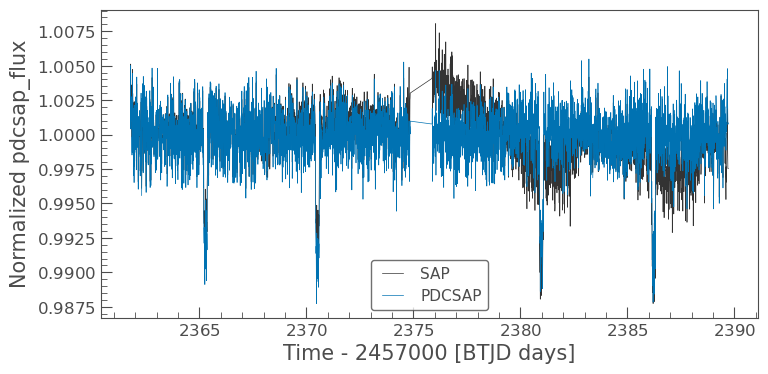

In [13]:
ax = lcf[0].plot(column='sap_flux', normalize=True, label="SAP");
lcf[0].plot(ax=ax, column='pdcsap_flux', normalize=True, label="PDCSAP");

Text(0.5, 1.0, 'PDCSAP light curve of TIC 259070502')

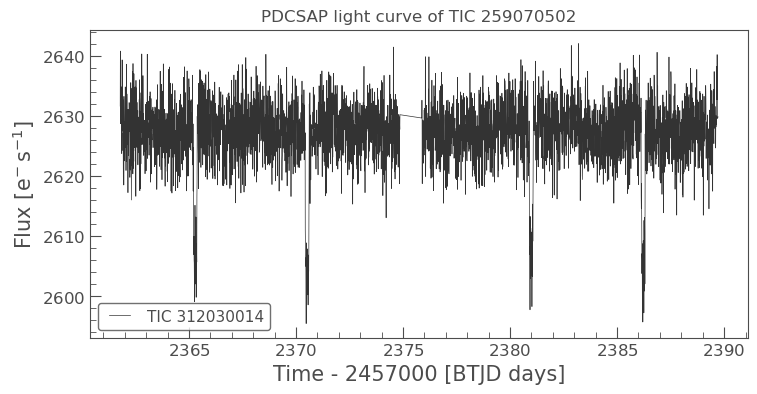

In [14]:
ax = lcf[0].plot() 
ax.set_title("PDCSAP light curve of TIC 312030014")

In [15]:
flat_lc = lcf[0].flatten(window_length=401)
folded_lc = flat_lc.fold(period=5.233728337283373833)
binned_lc = folded_lc.bin(time_bin_size=0.01)

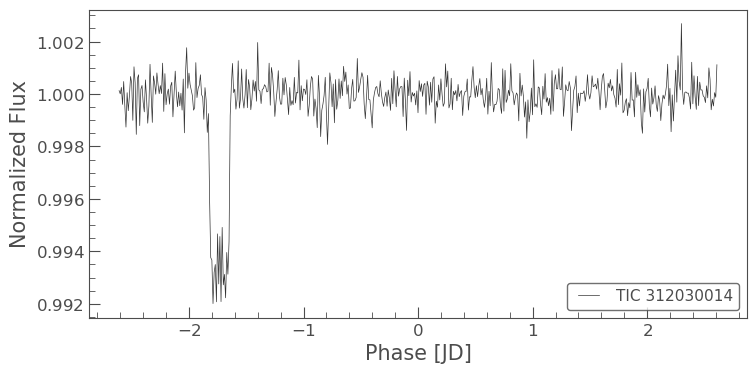

In [16]:
lcf[0].flatten(window_length=401).fold(period=5.233728337283373833).bin(time_bin_size=0.01).plot();

In [17]:
lcf[0].interact_bls()

In [18]:
ffi_data = search_ffi[1].download(cutout_size=10)

<AxesSubplot:title={'center':'Target ID: TIC 312030014, Cadence: 0'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

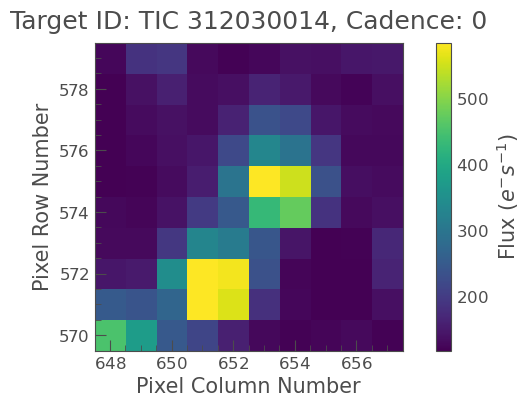

In [19]:
ffi_data.plot()

In [20]:
target_mask = ffi_data.create_threshold_mask(threshold=15, reference_pixel='center')
n_target_pixels = target_mask.sum()
n_target_pixels

1

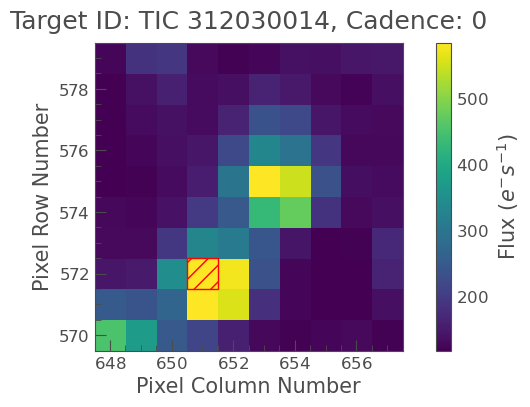

In [21]:
ffi_data.plot(aperture_mask=target_mask, mask_color='r');

In [22]:
ffi_lc = ffi_data.to_lightcurve(aperture_mask=target_mask)

In [23]:
ffi_lc

time,flux,flux_err,centroid_col,centroid_row,cadenceno,quality
,electron / s,electron / s,pix,pix,,
Time,float32,float32,float64,float64,int32,int32
1653.952275295389,748.815673828125,0.7647477388381958,651.0,572.0,0,0
1653.973108637769,749.4462280273438,0.7653491497039795,651.0,572.0,1,0
1653.9939419794496,748.8577880859375,0.7647235989570618,651.0,572.0,2,0
1654.0147753204328,748.1099853515625,0.7643890976905823,651.0,572.0,3,0
1654.0356086611835,748.2704467773438,0.7645035982131958,651.0,572.0,4,0
1654.0564420014675,748.6484375,0.76471346616745,651.0,572.0,5,0
1654.0772753412862,750.4370727539062,0.7654795050621033,651.0,572.0,6,0
1654.0981086811046,751.8439331054688,0.7660561203956604,651.0,572.0,7,0


<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

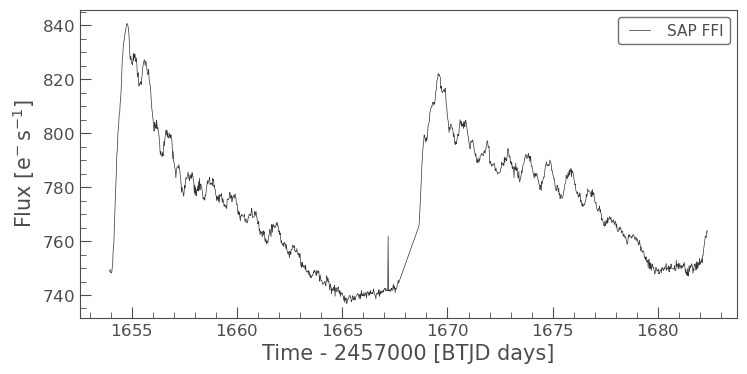

In [24]:
ffi_lc.plot(label="SAP FFI")

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

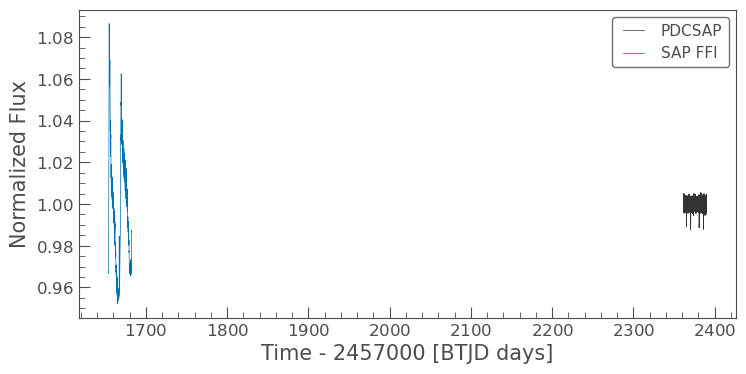

In [25]:
ax = lcf[0].plot(column='pdcsap_flux', normalize=True, label="PDCSAP");
ffi_lc.plot(ax=ax, normalize=True, label="SAP FFI")

In [26]:
ffi_data.interact()
ffi_data.interact_sky()

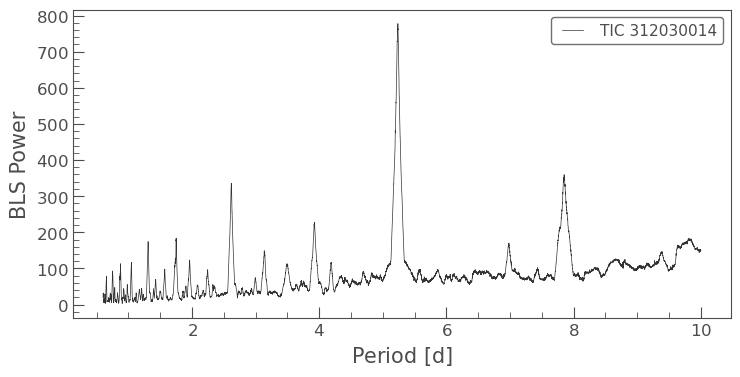

In [27]:
periodogram = flat_lc.to_periodogram(method="bls", period=np.arange(0.6, 10, 0.001))
periodogram.plot();

In [28]:
best_fit_period = periodogram.period_at_max_power
print('Best fit period: {:.3f}' .format(best_fit_period))

Best fit period: 5.236 d


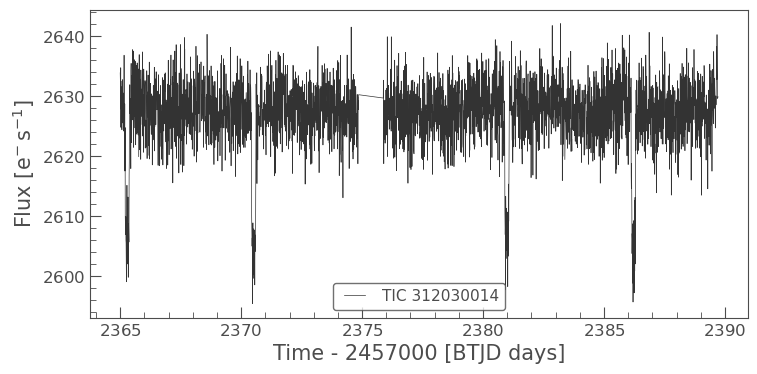

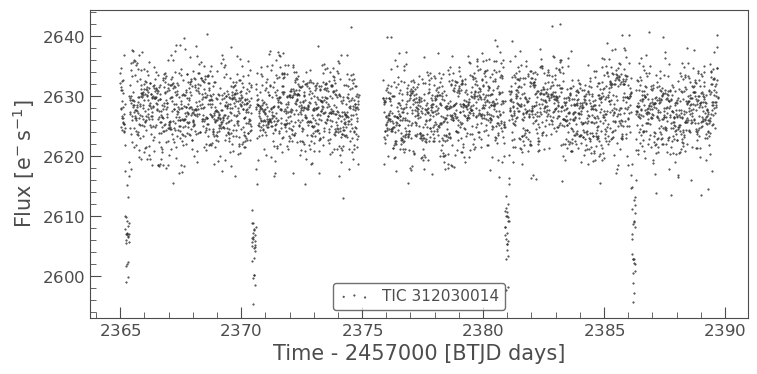

In [29]:
mask = ((lcf[0].time.value < 2390)&(lcf[0].time.value > 2365))
masked_lc=lcf[0][mask];
masked_lc.plot();
masked_lc.scatter(s=1);

In [30]:
# Assume masked_lc is the light curve object with any NaNs removed.
period = np.linspace(0.4, 30, 100000)  # limit the period range to 0.4 to 30
bls = masked_lc.to_periodogram(method='bls', period=period, frequency_factor=100)

(0.0, 1085.548973)

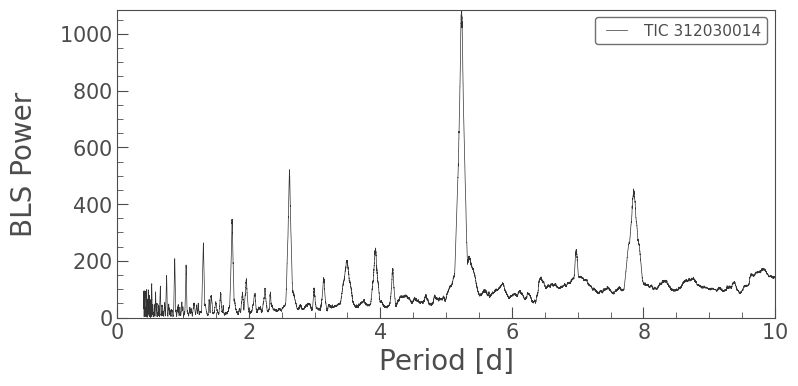

In [31]:
# Plot the periodogram
bls.plot()
plt.ylabel('BLS Power', fontsize=20, labelpad=15)
plt.xlabel('Period [d]', fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlim(0, 10)
plt.ylim([0, 1085.548973])

In [32]:
# Find the periods and powers sorted by power
powers = bls.power
periods = bls.period
sorted_indices = np.argsort(powers)[::-1]
sorted_powers = powers[sorted_indices]
sorted_periods = periods[sorted_indices]
sorted_transits = sorted_transits = bls.transit_time.jd[sorted_indices]

In [33]:
# Print the periods and powers of the highest and second highest peaks
# Reasoning behind 9 is that is the most confirmed and unconfirmed planets of a solar system (the Sun's solar system)
for i in range(9):
    # check if the current power has a different mantissa than the previous one
    if i > 0 and np.floor(np.log10(sorted_powers[i])) != np.floor(np.log10(sorted_powers[i-1])):
        print('----------------------------------------')
    print(f'Period at {i+1}th max power = {sorted_periods[i]:.18f}')
    print(f'BLS max power = {sorted_powers[i]:f}')
    print(f'Epoch max power = {sorted_transits[i]:f}')
    print('----------------------------------------')

Period at 1th max power = 5.233728337283373833 d
BLS max power = 1085.548973
Epoch max power = 2459365.290220
----------------------------------------
Period at 2th max power = 5.236096360963609975 d
BLS max power = 1083.673942
Epoch max power = 2459365.280220
----------------------------------------
Period at 3th max power = 5.236688366883669232 d
BLS max power = 1083.673942
Epoch max power = 2459365.280220
----------------------------------------
Period at 4th max power = 5.236392363923640048 d
BLS max power = 1083.673942
Epoch max power = 2459365.280220
----------------------------------------
Period at 5th max power = 5.236984369843699305 d
BLS max power = 1083.673942
Epoch max power = 2459365.280220
----------------------------------------
Period at 6th max power = 5.237280372803728490 d
BLS max power = 1076.734842
Epoch max power = 2459365.280220
----------------------------------------
Period at 7th max power = 5.234320343203433090 d
BLS max power = 1074.567288
Epoch max power =

C:\Users\andre\anaconda3\lib\site-packages\lightkurve\lightcurve.py:1040: LightkurveWarning: `epoch_time` appears to be given in JD, however the light curve time uses BTJD (i.e. JD - 2457000).
  warnings.warn(


(2575.0, 2650.0)

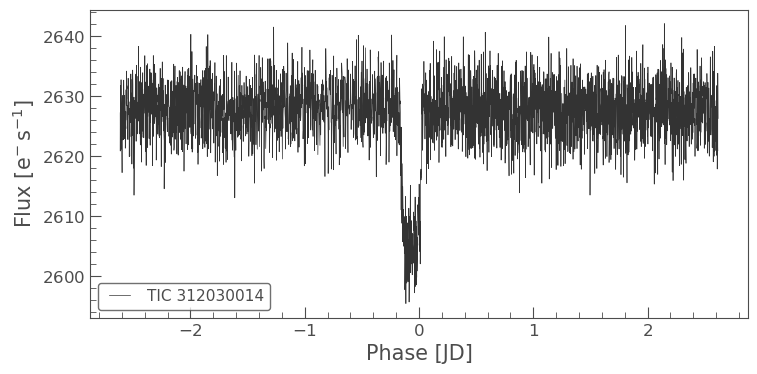

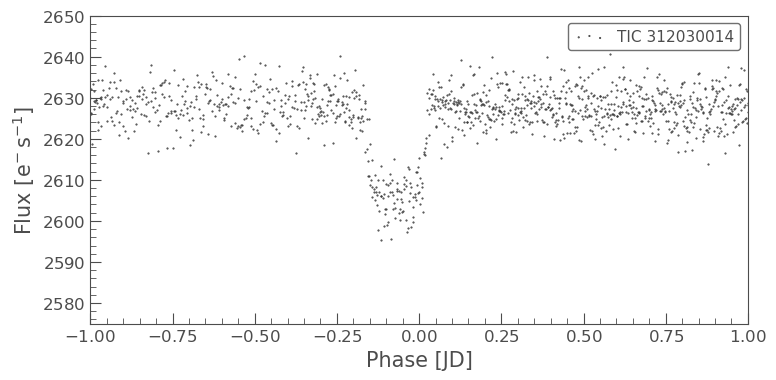

In [34]:
#Here we will fold the lightcurve based on the period and the epoch time we found earlier.
#After folding your light curve you should see a signal (transit) on phase 0.
periodvalue= 5.233728337283373833
epochtime = 2459365.290220
folded_lc = masked_lc.fold(periodvalue, epoch_time=epochtime)
folded_lc.plot();
folded_lc.scatter(s=1)
#Limits on x and y axis are given manually. You may need to change them.
plt.xlim(-1,1)
plt.ylim([2575,2650])

C:\Users\andre\anaconda3\lib\site-packages\lightkurve\lightcurve.py:1040: LightkurveWarning: `epoch_time` appears to be given in JD, however the light curve time uses BTJD (i.e. JD - 2457000).
  warnings.warn(


(2575.0, 2650.0)

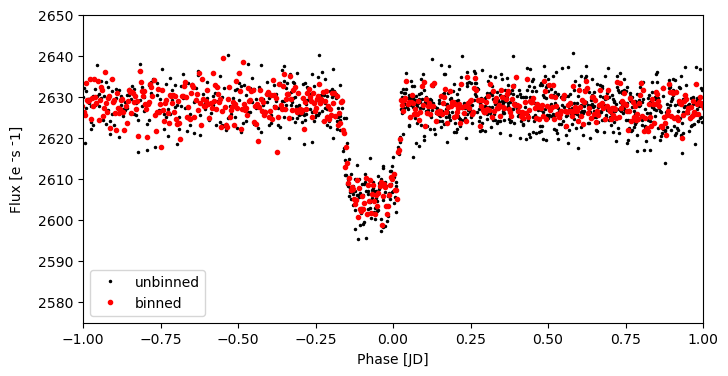

In [35]:
period  = periodvalue
t0 = epochtime 

folded2_lc = masked_lc.fold(periodvalue, epoch_time=epochtime)

#Bin the folded lightcurve. Here we bin at 30 minutes.
folded2_lc_binned = folded_lc.bin(5/24/60)

fig, ax = plt.subplots(figsize = (8,4))

folded2_lc.plot(ax = ax, marker = '.', linewidth = 0, color = 'black', alpha = 1, markersize = 3)
folded2_lc_binned.plot(ax = ax, marker = 'o', linewidth = 0, color = 'red', alpha = 1, markersize = 3)
plt.legend(labels= ['unbinned', 'binned'], fontsize=10)
plt.ylabel('Flux [e ־s ־1]', fontsize=10, labelpad=10)
plt.xlabel('Phase [JD]', fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
#Limits on x and y axis are given manually. You may need to change them.
plt.xlim(-1,1)
plt.ylim([2575,2650])

In [36]:
min = np.nanmin(folded2_lc_binned.flux) #Minimum flux of the binned lightcurve
print('Minimum flux = ', min)
median = np.nanmedian(folded2_lc_binned.flux) #Median flux of the binned lightcurve. The median flux should be equal to 1.
print('median flux =', median)
Tdepth = median - min
print('Tdepth = ', Tdepth)
print('Tdepth in ppm = ', Tdepth * (10**6), 'ppm')
ratio = np.sqrt(Tdepth)
print('Rp/Rs ratio = ', ratio) #Exoplanet's radius and Star's radius ratio.

Minimum flux =  2598.76123046875 electron / s
median flux = 2627.7001953125 electron / s
Tdepth =  28.93896484375 electron / s
Tdepth in ppm =  28938964.84375 electron / s ppm
Rp/Rs ratio =  5.379494850239193 electron(1/2) / s(1/2)


In [37]:
planet_b_period = bls.period_at_max_power
planet_b_t0 = bls.transit_time_at_max_power
planet_b_dur = bls.duration_at_max_power

In [38]:
planet_b_dur
print('Transit duration in hours=', planet_b_dur*24, 'hours')

Transit duration in hours= 3.5999999999999996 d hours


In [39]:
#Transit depth from bls model
planet_b_depth = bls.depth_at_max_power
print('depth = ', planet_b_depth)
print('depth in ppm =', planet_b_depth * (10**6), 'ppm')

depth =  21.860262128783095 electron / s
depth in ppm = 21860262.128783096 electron / s ppm


In [40]:
print(bls.period_at_max_power)
print(bls.transit_time_at_max_power)
print(bls.duration_at_max_power)

5.233728337283374 d
2365.2902199741784
0.15 d


In [41]:
P = 5.233728337283373833 * 24 * 60 * 60 #planet's period
G = 6.674* 10 ** -11 #gravitational constant
Msun = 1.98847 * 10**30 #Sun mass
M = 1.27 * Msun #Star's mass
pi = math.pi
a = ((P**2)/((4*pi**2)/(G*M)))**(1/3) #Orbital radius or semi-major axis
print('Orbital Radius')
print('a =',a , 'm')
print('a =',a/1000 , 'km')
print('a =',a/1000 * 0.000000006684587, 'AU')
print('The planetary mass was neglected')

Orbital Radius
a = 19055099531.698677 m
a = 19055099.531698678 km
a = 0.12737547061329907 AU
The planetary mass was neglected


In [42]:
L = 3.304748 #Star's luminosity
ri= (L/1.1)**(1/2)
ro= (L/0.53)**(1/2)
print('Habitable Zone')
print('The inner boundary of the habitable zone ri =', ri, 'AU')
print('The outer boundary of the habitable zone ro =', ro, 'AU')

Habitable Zone
The inner boundary of the habitable zone ri = 1.5111118724002834 AU
The outer boundary of the habitable zone ro = 2.17698293906524 AU


In [43]:
Rs = 1.49026 #Star's radius
Transit_depth = Tdepth
Rsun  = 696340 #Sun radius
Rearth = 6371 #Earth radius
Rp = (Rs * Transit_depth ** (1/2)) * Rsun #Exoplanet's radius
print('Planet Radius')
print('Rp =', Rp, 'km')
print('Rp=',Rp/Rearth, 'Radius of the Earth')
aRs = (a/1000)/(Rs*Rsun)
print('Orbital Period and Star Radius ratio')
print('a/Rs =', aRs)

Planet Radius
Rp = 4885215.4814640125 electron(1/2) / s(1/2) km
Rp= 766.7894335997509 electron(1/2) / s(1/2) Radius of the Earth
Orbital Period and Star Radius ratio
a/Rs = 20.983068237319358


In [44]:
P = 5.233728337283373833 * 24 * 60 * 60
pi = math.pi
a = 5388848826.434916 #semi-major axis in meters
v = (2*pi*a/P)
print('Planet Velocity')
print('v =',v , 'm/s')

Planet Velocity
v = 26174.858740346994 m/s


In [45]:
print('Period = ',bls.period_at_max_power)
print('Transit duration in hours planet disk fully superimposed to the stellar disk positions 2 - 3 Tf = ', bls.duration_at_max_power*24,'hours')
print('- - - - - - - - - - - - - - - - - - - - ')
print('Transit depth = ', Tdepth)
print('Transit depth in ppm = ', Tdepth * (10**6), 'ppm')
print('Transit Depth from bls model in ppm =', planet_b_depth * (10**6), 'ppm')
ratio = np.sqrt(Tdepth)
print('Rp/Rs ratio = ', ratio)
print('- - - - - - - - - - - - - - - - - - - - ')
print('Planet Radius')
print('Rp =', Rp, 'km')
print('Rp=',Rp/Rearth, 'Rearth')
print('- - - - - - - - - - - - - - - - - - - - ')
print('Orbital Radius')
print('a =',a , 'm')
print('a =',a/1000 , 'km')
print('a =',a/1000 * 0.000000006684587, 'AU')
print('The planetary mass was neglected')
print('- - - - - - - - - - - - - - - - - - - - ')
print('Orbital Period and Star Radius ratio')
print('a/Rs', aRs)
print('- - - - - - - - - - - - - - - - - - - - ')
print('Planet Velocity')
print('v =',v , 'm/s')
print('- - - - - - - - - - - - - - - - - - - - ')

Period =  5.233728337283374 d
Transit duration in hours planet disk fully superimposed to the stellar disk positions 2 - 3 Tf =  3.5999999999999996 d hours
- - - - - - - - - - - - - - - - - - - - 
Transit depth =  28.93896484375 electron / s
Transit depth in ppm =  28938964.84375 electron / s ppm
Transit Depth from bls model in ppm = 21860262.128783096 electron / s ppm
Rp/Rs ratio =  5.379494850239193 electron(1/2) / s(1/2)
- - - - - - - - - - - - - - - - - - - - 
Planet Radius
Rp = 4885215.4814640125 electron(1/2) / s(1/2) km
Rp= 766.7894335997509 electron(1/2) / s(1/2) Rearth
- - - - - - - - - - - - - - - - - - - - 
Orbital Radius
a = 5388848826.434916 m
a = 5388848.826434916 km
a = 0.036022228810152095 AU
The planetary mass was neglected
- - - - - - - - - - - - - - - - - - - - 
Orbital Period and Star Radius ratio
a/Rs 20.983068237319358
- - - - - - - - - - - - - - - - - - - - 
Planet Velocity
v = 26174.858740346994 m/s
- - - - - - - - - - - - - - - - - - - - 


In [ ]:
lk.show_citation_instructions()

C:\Users\andre\anaconda3\lib\site-packages\lightkurve\interact.py:545: LightkurveWarning: interact_sky() - cannot obtain nearby TICs. Skip it. The error: not enough values to unpack (expected 3, got 2)
  warnings.warn(
C:\Users\andre\anaconda3\lib\site-packages\lightkurve\interact.py:631: LightkurveWarning: Proper motion correction cannot be applied to the target, as none is available. Thus the target (the cross) might be noticeably away from its actual position, if it has large proper motion.
  warnings.warn(("Proper motion correction cannot be applied to the target, as none is available. "
